# Segmenting and Clustering Neighborhoods in Toronto

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1><font color=black>Question 1</font></h1>
</div>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import requests
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

from bs4 import BeautifulSoup
from pandas import json_normalize
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# fetching wikipedia page to get the ZIP codes.
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data  = requests.get(url).text

#using beautiful soup to navigate through data
soup = BeautifulSoup(data, 'html5lib')

#### From hints:
- Firstly create a list  
- Later after finding the table and table data  create a dictionary called cell having 3 keys PostalCode, Borough and Neighborhood
- As postal code contains upto 3 characters extract that using tablerow.p.text
- Next use split ,strip and replace functions for getting Borough and Neighborhood information
- Append to the list  
- Create a dataframe with list

In [3]:
#using tips provided to decode the page
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [4]:
#checking dataset
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [5]:
#verify if we have data according to spec:
df.query("PostalCode == 'M5A'")

,PostalCode,Borough,Neighborhood
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [6]:
#verify if we have data according to spec and filter only Toronto Area:
df[df['Borough'].str.contains("Toronto")]

,PostalCode,Borough,Neighborhood
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
9,M5B,Downtown Toronto,"Garden District, Ryerson"
15,M5C,Downtown Toronto,St. James Town
19,M4E,East Toronto,The Beaches
20,M5E,Downtown Toronto,Berczy Park
24,M5G,Downtown Toronto,Central Bay Street
25,M6G,Downtown Toronto,Christie
30,M5H,Downtown Toronto,"Richmond, Adelaide, King"
31,M6H,West Toronto,"Dufferin, Dovercourt Village"
35,M4J,East York/East Toronto,The Danforth East


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1><font color=black>Question 2</font></h1>
</div>

In [7]:
import geocoder # import geocoder

In [8]:
# As per tip provided, but it did not work due timeout so we are using the CSV.
'''
variable to None
lat_lng_coords = None
postal_code='M5G'

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
'''

"\nvariable to None\nlat_lng_coords = None\npostal_code='M5G'\n\n# loop until you get the coordinates\nwhile(lat_lng_coords is None):\n  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))\n  lat_lng_coords = g.latlng\n\nlatitude = lat_lng_coords[0]\nlongitude = lat_lng_coords[1]\n"

In [9]:
# reading CSV as per instructions provided:
coord_df = pd.read_csv("Geospatial_Coordinates.csv")
coord_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
#checking if we have valid counts
mask=df['PostalCode'].value_counts()>0
print(df.shape)
df[mask.values]


(103, 3)


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [11]:
#checking if we have duplicated rows on data frame
mask=coord_df['Postal Code'].value_counts()>1
print(coord_df.shape)
do_we_have_duplicates=coord_df[mask.values]
do_we_have_duplicates.shape

(103, 3)


(0, 3)

In [12]:
#renaming postal code column
coord_df=coord_df.rename(columns={"Postal Code": "PostalCode"})

In [13]:
#checking results
coord_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
# merge results from original dataframe and call it results
result = pd.merge(df, coord_df, on="PostalCode")

In [15]:
result.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1><font color=black>Question 3</font></h1>
</div>

In [16]:
#soft copy the dataframe to df Toronto:
dft=result
dft.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [17]:
#Check results:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(dft['Borough'].unique()),
        dft.shape[0]
    )
)

The dataframe has 15 boroughs and 103 neighborhoods.


In [18]:
#importing library to find latitude & longitude for Toronto
from geopy.geocoders import Nominatim 

In [19]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [20]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dft['Latitude'], dft['Longitude'], dft['Borough'], dft['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Reducing the dataset to a smaller Toronto area.

In [21]:
# Filtering only Toronto area
dft=result[result['Borough'].str.contains("Toronto")].reset_index(drop=True)
dft.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [22]:
# create map of Toronto smaller area using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(dft['Latitude'], dft['Longitude'], dft['Borough'], dft['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Foursquare integration

In [1]:
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxx
CLIENT_SECRET:xxx


In [24]:
# Reset index
dft.reset_index(inplace=True)

In [25]:
#check sample
dft.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

In [26]:
# Testing it
neighborhood_latitude = dft.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dft.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = dft.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


In [27]:
#define limits for Foursquare and create call
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
#radius = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [28]:
#fetch data from foursquare
results = requests.get(url).json()
# results

**get_category_type** function from the Foursquare lab:


In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980


In [31]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

44 venues were returned by Foursquare.


Function from exercises:

In [32]:
#from exercises:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
toronto_venues = getNearbyVenues(names=dft['Neighborhood'],
                                   latitudes=dft['Latitude'],
                                   longitudes=dft['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

In [34]:
print(toronto_venues.shape)
toronto_venues.head()

(1583, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Let's check how many venues were returned for each neighborhood


In [35]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,59,59,59,59,59,59
"Brockton, Parkdale Village, Exhibition Place",25,25,25,25,25,25
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,64,64,64,64,64,64
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35
Davisville North,9,9,9,9,9,9


#### Let's find out how many unique categories can be curated from all the returned venues


In [36]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 uniques categories.


In [37]:
toronto_venues['Neighborhood'] 

0       Regent Park, Harbourfront
1       Regent Park, Harbourfront
2       Regent Park, Harbourfront
3       Regent Park, Harbourfront
4       Regent Park, Harbourfront
                  ...            
1578               Enclave of M4L
1579               Enclave of M4L
1580               Enclave of M4L
1581               Enclave of M4L
1582               Enclave of M4L
Name: Neighborhood, Length: 1583, dtype: object

In [38]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])


toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
cols = list(toronto_onehot.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Neighborhood'))
toronto_onehot = toronto_onehot[['Neighborhood']+cols] #Create new dataframe with columns in the order you want

In [40]:
# verify if we have the columns in the right order
toronto_onehot.head()

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#check neighborhood only
toronto_onehot['Neighborhood']

0       Regent Park, Harbourfront
1       Regent Park, Harbourfront
2       Regent Park, Harbourfront
3       Regent Park, Harbourfront
4       Regent Park, Harbourfront
                  ...            
1578               Enclave of M4L
1579               Enclave of M4L
1580               Enclave of M4L
1581               Enclave of M4L
1582               Enclave of M4L
Name: Neighborhood, Length: 1583, dtype: object

In [42]:
#check the size of dataframe
toronto_onehot.shape

(1583, 232)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [43]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.066667,0.066667,0.066667,0.133333,0.133333,0.133333,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.015625,0.000000,0.000000,0.015625,0.000000,0.000000
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.026667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333
6,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.028571,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Dufferin, Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Verify the size

In [44]:
toronto_grouped.shape

(39, 232)

#### Let's print each neighborhood along with the top 5 most common venues


In [45]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.08
1  Cocktail Bar  0.05
2   Cheese Shop  0.03
3    Restaurant  0.03
4      Pharmacy  0.03


----Brockton, Parkdale Village, Exhibition Place----
                   venue  freq
0                   Café  0.12
1         Breakfast Spot  0.08
2  Performing Arts Venue  0.08
3                 Bakery  0.08
4            Coffee Shop  0.08


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.13
1   Airport Service  0.13
2  Airport Terminal  0.13
3          Boutique  0.07
4           Airport  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1      Sandwich Place  0.06
2                Café  0.05
3  Italian Restaurant  0.05
4     Bubble Tea Shop  0.03


----Christie----
                venue  freq
0       Grocery Store  0.25
1                Café  0.19
2                Park  0.12
3  Ita

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Restaurant,Pharmacy,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Indian Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Performing Arts Venue,Bakery,Coffee Shop,Gym,Restaurant,Burrito Place,Stadium,Music Venue
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Boutique,Airport,Sculpture Garden,Rental Car Location,Boat or Ferry,Plane,Harbor / Marina
3,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Bubble Tea Shop,Burger Joint,Salad Place,Thai Restaurant,Yoga Studio,New American Restaurant
4,Christie,Grocery Store,Café,Park,Italian Restaurant,Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop,Nightclub


In [48]:
#checking for null values
print(neighborhoods_venues_sorted.shape)

(39, 11)


## 4. Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [49]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans = KMeans(n_clusters=kclusters, n_init=500, max_iter=500, 
                algorithm='full',init='k-means++',tol=1e-6).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = dft

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,index,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Café,Park,Pub,Theater,Breakfast Spot,Restaurant,Event Space,Electronics Store
1,1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Cosmetics Shop,Bubble Tea Shop,Café,Japanese Restaurant,Pizza Place,Bookstore,Hotel,Italian Restaurant
2,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Gastropub,Cosmetics Shop,Cocktail Bar,Gym,Beer Bar,Hotel,Lingerie Store,Moroccan Restaurant
3,3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Trail,Health Food Store,Asian Restaurant,Pub,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Yoga Studio
4,4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Cheese Shop,Restaurant,Pharmacy,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Indian Restaurant


In [51]:
neighborhoods_venues_sorted.head()
neighborhoods_venues_sorted.drop(['Cluster Labels'],axis=1,inplace=True)

In [52]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = dft

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(39, 17)


,index,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Café,Park,Pub,Theater,Breakfast Spot,Restaurant,Event Space,Electronics Store
1,1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Cosmetics Shop,Bubble Tea Shop,Café,Japanese Restaurant,Pizza Place,Bookstore,Hotel,Italian Restaurant
2,2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Gastropub,Cosmetics Shop,Cocktail Bar,Gym,Beer Bar,Hotel,Lingerie Store,Moroccan Restaurant
3,3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Trail,Health Food Store,Asian Restaurant,Pub,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Yoga Studio
4,4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Cheese Shop,Restaurant,Pharmacy,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Indian Restaurant


In [53]:
#toronto_merged.query("'Cluster Labels' == 'nan'")
#df.query("PostalCode == 'M5A'")
#toronto_merged.filter(like='nan', axis=0)
#toronto_merged['Cluster Labels'].tolist()
# showing places with NAN
toronto_merged[toronto_merged['Cluster Labels'].isnull()]

,index,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


Finally, let's visualize the resulting clusters


In [54]:
#dropping places with nan values
print(toronto_merged.shape)
toronto_merged=toronto_merged.dropna()
print(toronto_merged.shape)

(39, 17)
(39, 17)


In [55]:
# create a new map with smaller area of study
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], 
                                  toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


## 5. Examine Clusters


Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


#### Cluster 1


In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,M4T,-79.38316,0,Tennis Court,Restaurant,Music Venue,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant


#### Cluster 2


In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,-79.360636,1,Coffee Shop,Bakery,Café,Park,Pub,Theater,Breakfast Spot,Restaurant,Event Space,Electronics Store
1,M5B,-79.378937,1,Coffee Shop,Clothing Store,Cosmetics Shop,Bubble Tea Shop,Café,Japanese Restaurant,Pizza Place,Bookstore,Hotel,Italian Restaurant
2,M5C,-79.375418,1,Coffee Shop,Café,Gastropub,Cosmetics Shop,Cocktail Bar,Gym,Beer Bar,Hotel,Lingerie Store,Moroccan Restaurant
3,M4E,-79.293031,1,Trail,Health Food Store,Asian Restaurant,Pub,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Yoga Studio
4,M5E,-79.373306,1,Coffee Shop,Cocktail Bar,Cheese Shop,Restaurant,Pharmacy,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Indian Restaurant
5,M5G,-79.387383,1,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Bubble Tea Shop,Burger Joint,Salad Place,Thai Restaurant,Yoga Studio,New American Restaurant
6,M6G,-79.422564,1,Grocery Store,Café,Park,Italian Restaurant,Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop,Nightclub
7,M5H,-79.384568,1,Coffee Shop,Café,Restaurant,Thai Restaurant,Deli / Bodega,Clothing Store,Gym,Pizza Place,Salad Place,Steakhouse
8,M6H,-79.442259,1,Pharmacy,Bakery,Music Venue,Coffee Shop,Middle Eastern Restaurant,Café,Supermarket,Bar,Bank,Brewery
10,M5J,-79.381752,1,Coffee Shop,Aquarium,Hotel,Café,Fried Chicken Joint,Sporting Goods Shop,Italian Restaurant,Scenic Lookout,Brewery,Restaurant


#### Cluster 3


In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,M4N,-79.38879,2,Park,Swim School,Bus Line,Yoga Studio,Movie Theater,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant


#### Cluster 4


In [59]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,M5N,-79.416936,3,Fast Food Restaurant,Home Service,Garden,Music Venue,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop


#### Cluster 5


In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,M4J,-79.338106,4,Convenience Store,Park,Intersection,Yoga Studio,Music Venue,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
21,M5P,-79.411307,4,Park,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Movie Theater,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant
33,M4W,-79.377529,4,Park,Playground,Trail,Museum,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop


In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


<a id='item4'></a>


In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,PostalCode,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [ ]:
## Preapare dataframe for heatmap chart

In [64]:
# Melting columns
dfm=pd.melt(toronto_merged, id_vars=['Cluster Labels'], value_vars=['1st Most Common Venue','2nd Most Common Venue',
                                                                 '3rd Most Common Venue','4th Most Common Venue',
                                                                 '5th Most Common Venue','6th Most Common Venue',
                                                                 '7th Most Common Venue','8th Most Common Venue',
                                                                 '9th Most Common Venue','10th Most Common Venue'
                                                                    ],
        var_name='Common Venue', value_name='Cluster')
dfm.head()

,Cluster Labels,Common Venue,Cluster
0,1,1st Most Common Venue,Coffee Shop
1,1,1st Most Common Venue,Coffee Shop
2,1,1st Most Common Venue,Coffee Shop
3,1,1st Most Common Venue,Trail
4,1,1st Most Common Venue,Coffee Shop


In [65]:
# Labels of interest for heatmap
l1=['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue',
                                                                 '5th Most Common Venue','6th Most Common Venue',
                                                                 '7th Most Common Venue','8th Most Common Venue',
                                                                 '9th Most Common Venue','10th Most Common Venue']
#it's easier if we sort it backwards, from least common to most common venue.
l1=l1[::-1]

In [66]:
#creating a ranking for colormap zones based on common venues
ranking = {j:i for j,i in (zip(l1,range(100,210,10)))}
ranking

{'10th Most Common Venue': 100,
 '9th Most Common Venue': 110,
 '8th Most Common Venue': 120,
 '7th Most Common Venue': 130,
 '6th Most Common Venue': 140,
 '5th Most Common Venue': 150,
 '4th Most Common Venue': 160,
 '3rd Most Common Venue': 170,
 '2nd Most Common Venue': 180,
 '1st Most Common Venue': 190}

In [67]:
#converting ranking color scale to a pandas dataframe
ranking = pd.DataFrame(ranking, index=[0])

In [68]:
#Transpode dataframe
ranking=ranking.T.rename(columns={0: "grade"})
ranking

,grade
10th Most Common Venue,100
9th Most Common Venue,110
8th Most Common Venue,120
7th Most Common Venue,130
6th Most Common Venue,140
5th Most Common Venue,150
4th Most Common Venue,160
3rd Most Common Venue,170
2nd Most Common Venue,180
1st Most Common Venue,190


In [69]:
#Merge cluster labels & clusters with ranking
dfmcat=dfm.set_index('Common Venue').join(pd.DataFrame(ranking))
dfmcat.head()

,Cluster Labels,Cluster,grade
10th Most Common Venue,1,Electronics Store,100
10th Most Common Venue,1,Italian Restaurant,100
10th Most Common Venue,1,Moroccan Restaurant,100
10th Most Common Venue,1,Yoga Studio,100
10th Most Common Venue,1,Indian Restaurant,100


In [70]:
#Create a pivot table from ranked df
dfmcatpivot = dfmcat.pivot_table(values='grade', index=['Cluster Labels', 'Cluster'], aggfunc=np.average)
dfmcatpivot.head()

grade
Cluster Labels Cluster                         
0              Massage Studio             160.0
               Mediterranean Restaurant   150.0
               Men's Store                140.0
               Mexican Restaurant         130.0
               Middle Eastern Restaurant  120.0

In [71]:
#group by and get the max value for eat venue grupped
dfmcatpivot=dfmcat.groupby(['Cluster Labels', 'Cluster']).max().reset_index()
dfmcatpivot.head()

,Cluster Labels,Cluster,grade
0,0,Massage Studio,160
1,0,Mediterranean Restaurant,150
2,0,Men's Store,140
3,0,Mexican Restaurant,130
4,0,Middle Eastern Restaurant,120


In [72]:
#create a pivot table from it
dfmcatpivot2 = dfmcatpivot.pivot(columns='Cluster Labels',index='Cluster',values='grade')
dfmcatpivot2.fillna(0, inplace=True)
dfmcatpivot2.head()

Cluster Labels,0,1,2,3,4
Cluster,,,,,
Airport,0.0,150.0,0.0,0.0,0.0
Airport Lounge,0.0,190.0,0.0,0.0,0.0
Airport Service,0.0,180.0,0.0,0.0,0.0
Airport Terminal,0.0,170.0,0.0,0.0,0.0
American Restaurant,0.0,170.0,0.0,0.0,0.0


In [73]:
#check the values of the index
dfmcatpivot2.index

Index(['Airport', 'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Aquarium', 'Arts & Crafts Store',
       'Asian Restaurant', 'Athletics & Sports', 'Auto Workshop',
       ...
       'Supermarket', 'Sushi Restaurant', 'Swim School', 'Tennis Court',
       'Thai Restaurant', 'Theater', 'Trail', 'Vegetarian / Vegan Restaurant',
       'Vietnamese Restaurant', 'Yoga Studio'],
      dtype='object', name='Cluster', length=130)

In [79]:
print(dfmcatpivot2.index[50:])

Index(['Farmers Market', 'Fast Food Restaurant', 'Fish & Chips Shop',
       'Flea Market', 'Flower Shop', 'Food & Drink Shop',
       'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Fruit & Vegetable Store',
       'Furniture / Home Store', 'Gaming Cafe', 'Garden', 'Gastropub',
       'Gift Shop', 'Gourmet Shop', 'Greek Restaurant', 'Grocery Store', 'Gym',
       'Gym / Fitness Center', 'Harbor / Marina', 'Health Food Store',
       'Home Service', 'Hotel', 'Ice Cream Shop', 'Indian Restaurant',
       'Intersection', 'Italian Restaurant', 'Japanese Restaurant',
       'Jewelry Store', 'Light Rail Station', 'Lingerie Store', 'Liquor Store',
       'Lounge', 'Massage Studio', 'Mediterranean Restaurant', 'Men's Store',
       'Mexican Restaurant', 'Middle Eastern Restaurant', 'Miscellaneous Shop',
       'Modern European Restaurant', 'Molecular Gastronomy Restaurant',
       'Monument / Landmark', 'Moroccan Restaurant', 'Movie Theater', 'Museum',
       'Music Venue', 'New American Restau

## Creating a heatmap

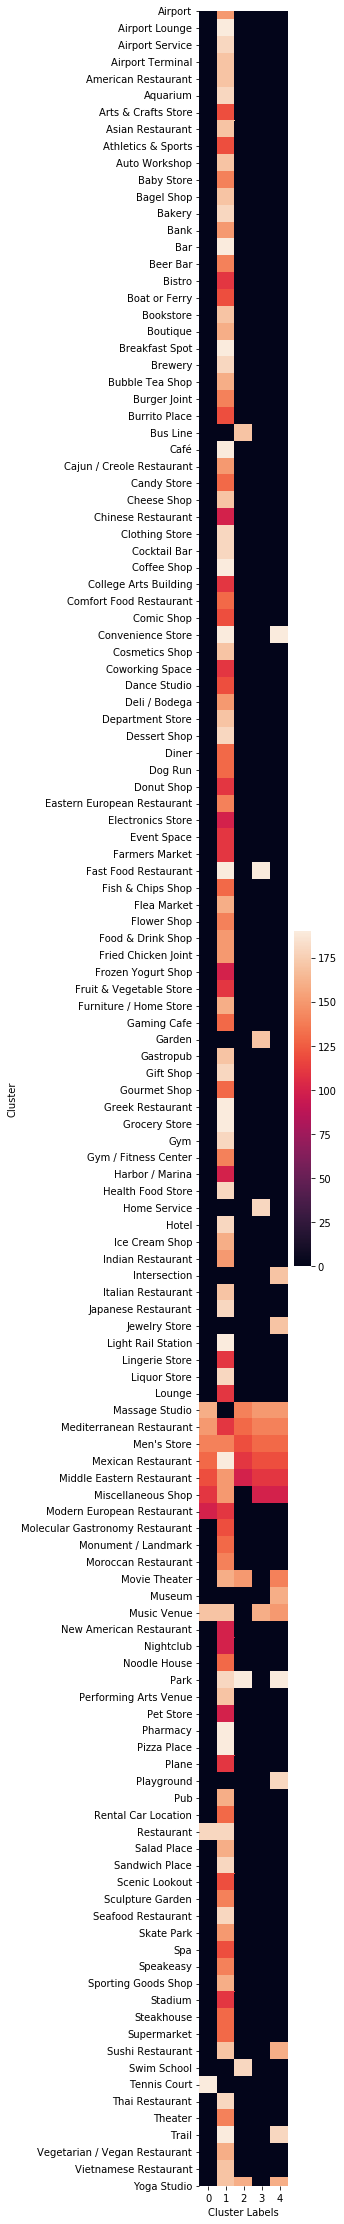

In [76]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(2, 40))
ax.set_yticklabels(dfmcatpivot2.index,rotation=0, fontsize="10", va="center")
ax = sns.heatmap(dfmcatpivot2)


## Findings
- All clusters on this area share places like Mediterranean Restaurants, Men's store, Mexican Restaurants, Middle Eastern Restaurants. But cluster 2 has the highest concentration of Mexican restaurants.
- Cluster 1 is a central region where we have most of the places, and is bar far the highest ranked one.
- Cluster 0 is unique for a Tenis court.
- Cluster 2 is unique for swim school and bus line.
- Cluster 3 is unique for home service and Garden.
- Cluster 4 is unique for intersection, jewelry,museum and playground .